<a href="https://colab.research.google.com/github/AycaCicek/test_repo/blob/master/GLOBALAI_project(deeplearning).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

A numeric identifier of the sound class:
* 0 = air_conditioner
* 1 = car_horn
* 2 = children_playing
* 3 = dog_bark
* 4 = drilling
* 5 = engine_idling
* 6 = gun_shot
* 7 = jackhammer
* 8 = siren
* 9 = street_music

In [1]:
from google.colab import drive 
drive.mount("/content/drive")

Mounted at /content/drive


In [2]:
import os  
os.environ['KAGGLE_CONFIG_DIR'] = "/content/drive/MyDrive/kaggle"

In [3]:
%cd /content/drive/MyDrive/kaggle

/content/drive/MyDrive/kaggle


In [ ]:
!kaggle datasets download -d chrisfilo/urbansound8k

  3% 201M/5.61G [00:03<01:37, 59.7MB/s]
User cancelled operation


In [ ]:
!unzip \*.zip  && rm *.zipn

Archive:  urbansound8k.zip
  End-of-central-directory signature not found.  Either this file is not
  a zipfile, or it constitutes one disk of a multi-part archive.  In the
  latter case the central directory and zipfile comment will be found on
  the last disk(s) of this archive.
unzip:  cannot find zipfile directory in one of *.zip or
        *.zip.zip, and cannot find urbansound8k.zip.ZIP, period.

No zipfiles found.


# KÜTÜPHANELER

In [5]:
import pandas as pd 
import numpy as np
import librosa
import glob
import IPython.display as ipd
%pylab inline
from tqdm import tqdm 
import matplotlib.pyplot as plt

import warnings 
warnings.filterwarnings("ignore")

Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python3.7/dist-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['random']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [ ]:
df=pd.read_csv("UrbanSound8K.csv")
df

,slice_file_name,fsID,start,end,salience,fold,classID,class
0,100032-3-0-0.wav,100032,0.000000,0.317551,1,5,3,dog_bark
1,100263-2-0-117.wav,100263,58.500000,62.500000,1,5,2,children_playing
2,100263-2-0-121.wav,100263,60.500000,64.500000,1,5,2,children_playing
3,100263-2-0-126.wav,100263,63.000000,67.000000,1,5,2,children_playing
4,100263-2-0-137.wav,100263,68.500000,72.500000,1,5,2,children_playing
...,...,...,...,...,...,...,...,...
8727,99812-1-2-0.wav,99812,159.522205,163.522205,2,7,1,car_horn
8728,99812-1-3-0.wav,99812,181.142431,183.284976,2,7,1,car_horn
8729,99812-1-4-0.wav,99812,242.691902,246.197885,2,7,1,car_horn
8730,99812-1-5-0.wav,99812,253.209850,255.741948,2,7,1,car_horn


In [ ]:
df["class"].value_counts()

dog_bark            1000
children_playing    1000
air_conditioner     1000
street_music        1000
engine_idling       1000
jackhammer          1000
drilling            1000
siren                929
car_horn             429
gun_shot             374
Name: class, dtype: int64

In [ ]:
path=df["slice_file_name"]
fold=df["fold"]
id=df["classID"]
frames=[path,fold,id]
data = pd.concat(frames,axis=1)
data=pd.DataFrame(data)
data

,slice_file_name,fold,classID
0,100032-3-0-0.wav,5,3
1,100263-2-0-117.wav,5,2
2,100263-2-0-121.wav,5,2
3,100263-2-0-126.wav,5,2
4,100263-2-0-137.wav,5,2
...,...,...,...
8727,99812-1-2-0.wav,7,1
8728,99812-1-3-0.wav,7,1
8729,99812-1-4-0.wav,7,1
8730,99812-1-5-0.wav,7,1


In [ ]:
0 = air_conditioner
1 = car_horn
2 = children_playing
3 = dog_bark
4 = drilling
5 = engine_idling
6 = gun_shot
7 = jackhammer
8 = siren
9 = street_music

In [6]:
def create_spectogram(y):
  spec=librosa.feature.melspectrogram(y=y)
  spec_conv=librosa.amplitude_to_db(spec,ref=np.max)
  return spec_conv

In [7]:
dat1, sampling_rate1 = librosa.load('/content/drive/MyDrive/kaggle/fold1/101415-3-0-2.wav')

In [8]:
create_spectogram(dat1)

array([[-79.99999, -79.99999, -79.99999, ..., -79.99999, -79.99999,
        -79.99999],
       [-79.99999, -79.99999, -79.99999, ..., -79.99999, -79.99999,
        -79.99999],
       [-79.99999, -79.99999, -79.99999, ..., -79.99999, -79.99999,
        -79.99999],
       ...,
       [-79.99999, -79.99999, -79.99999, ..., -79.99999, -79.99999,
        -79.99999],
       [-79.99999, -79.99999, -79.99999, ..., -79.99999, -79.99999,
        -79.99999],
       [-79.99999, -79.99999, -79.99999, ..., -79.99999, -79.99999,
        -79.99999]], dtype=float32)

In [ ]:
audio_dataset_path="/content/drive/MyDrive/kaggle/"
metdata=pd.read_csv("/content/drive/MyDrive/kaggle/UrbanSound8K.csv")
metdata

,slice_file_name,fsID,start,end,salience,fold,classID,class
0,100032-3-0-0.wav,100032,0.000000,0.317551,1,5,3,dog_bark
1,100263-2-0-117.wav,100263,58.500000,62.500000,1,5,2,children_playing
2,100263-2-0-121.wav,100263,60.500000,64.500000,1,5,2,children_playing
3,100263-2-0-126.wav,100263,63.000000,67.000000,1,5,2,children_playing
4,100263-2-0-137.wav,100263,68.500000,72.500000,1,5,2,children_playing
...,...,...,...,...,...,...,...,...
8727,99812-1-2-0.wav,99812,159.522205,163.522205,2,7,1,car_horn
8728,99812-1-3-0.wav,99812,181.142431,183.284976,2,7,1,car_horn
8729,99812-1-4-0.wav,99812,242.691902,246.197885,2,7,1,car_horn
8730,99812-1-5-0.wav,99812,253.209850,255.741948,2,7,1,car_horn


In [ ]:
def feature_extractor(file):
  audio,sample_rate=librosa.load(file_name,res_type="kaiser_fast")
  mfccs_features=librosa.feature.mfcc(y=audio,sr=sample_rate,n_mfcc=40)
  mfccs_scaled_features=np.mean(mfccs_features.T,axis=0)

  return mfccs_scaled_features

In [ ]:
extracted_features=[]
for index_num,row in tqdm(metdata.iterrows()):
  file_name=os.path.join(os.path.abspath(audio_dataset_path),"fold"+str(row["fold"])+"/",str(row["slice_file_name"]))
  final_class_labels=row["class"]
  data=feature_extractor(file_name)
  extracted_features.append([data,final_class_labels])

8732it [49:41,  2.93it/s]


In [ ]:
extracted_features_df=pd.DataFrame(extracted_features,columns=["feature","class"])
extracted_features_df.head()

,feature,class
0,"[-214.95764, 70.502464, -130.70279, -53.116936...",dog_bark
1,"[-423.7311, 109.2299, -52.872597, 60.827538, 0...",children_playing
2,"[-458.52844, 121.35432, -46.535675, 51.969467,...",children_playing
3,"[-413.63254, 101.61351, -35.43868, 53.047146, ...",children_playing
4,"[-446.38693, 113.68634, -52.4572, 60.349724, 2...",children_playing
5,"[-446.64075, 116.91874, -33.8149, 55.398895, 2...",children_playing
6,"[-476.23175, 119.29175, -28.403315, 55.855236,...",children_playing
7,"[-463.81815, 116.27937, -28.78479, 49.436337, ...",children_playing
8,"[-471.1096, 125.35387, -37.010067, 57.4828, -1...",children_playing
9,"[-195.59555, 114.13017, -13.902405, 0.56244934...",car_horn


In [ ]:
csv=extracted_features_df.to_csv("urbansound8k_df.csv")
csv

In [ ]:
extracted_features_df["class"].value_counts()

dog_bark            1000
children_playing    1000
air_conditioner     1000
street_music        1000
engine_idling       1000
jackhammer          1000
drilling            1000
siren                929
car_horn             429
gun_shot             374
Name: class, dtype: int64

# IMAGES

In [ ]:
!unzip /content/drive/MyDrive/images/spectrograms.zip

Görüntülenen çıkış son 5000 satıra kısaltıldı.
  inflating: spectrograms/9/96169-9-1-49.png  
  inflating: spectrograms/9/94631-9-1-16.png  
  inflating: spectrograms/9/94631-9-0-12.png  
  inflating: spectrograms/5/39856-5-0-10.png  
  inflating: spectrograms/5/39856-5-0-18.png  
  inflating: spectrograms/5/39847-5-1-0.png  
  inflating: spectrograms/9/96169-9-1-61.png  
  inflating: spectrograms/5/39856-5-0-14.png  
  inflating: spectrograms/5/39854-5-1-2.png  
  inflating: spectrograms/5/39856-5-0-12.png  
  inflating: spectrograms/9/94182-9-0-9.png  
  inflating: spectrograms/9/96475-9-0-5.png  
  inflating: spectrograms/9/94631-9-1-3.png  
  inflating: spectrograms/9/94182-9-0-25.png  
  inflating: spectrograms/5/39856-5-0-19.png  
  inflating: spectrograms/9/96475-9-0-4.png  
  inflating: spectrograms/5/39854-5-0-0.png  
  inflating: spectrograms/5/39847-5-0-9.png  
  inflating: spectrograms/9/94182-9-0-16.png  
  inflating: spectrograms/5/39852-5-0-1.png  
  inflating: spectrogr

In [4]:
import random
import PIL
import cv2
from keras.preprocessing.image import load_img, ImageDataGenerator
from sklearn.model_selection import train_test_split
import tensorflow as tf
from keras import Sequential
from keras.layers import Conv2D, MaxPool2D, Flatten, Dense

In [9]:
label = [] # class
input_path = [] #file path
for class_name in os.listdir("spectrograms"):
  for path in os.listdir("spectrograms/"+class_name):
    if class_name =="0":
      label.append(0)
    elif class_name=="1":
      label.append(1)
    elif class_name=="2":
      label.append(2)
    elif class_name=="3":
      label.append(3)
    elif class_name=="4":
      label.append(4)
    elif class_name=="5":
      label.append(5)
    elif class_name=="6":
      label.append(6)
    elif class_name=="7":
      label.append(7)
    elif class_name=="8":
      label.append(8)
    else:
      label.append(9)
    input_path.append(os.path.join("spectrograms", class_name, path))

In [10]:
df = pd.DataFrame()
df["images"] = input_path
df["label"] = label
df = df.sample(frac=1).reset_index(drop=True)
df.head(10)

,images,label
0,spectrograms/0/204240-0-0-27.png,0
1,spectrograms/7/188824-7-3-0.png,7
2,spectrograms/8/24347-8-0-68.png,8
3,spectrograms/9/42953-9-0-16.png,9
4,spectrograms/2/13579-2-0-17.png,2
5,spectrograms/2/108362-2-0-12.png,2
6,spectrograms/6/174285-6-2-0.png,6
7,spectrograms/3/112195-3-0-38.png,3
8,spectrograms/8/117181-8-0-3.png,8
9,spectrograms/5/94710-5-0-2.png,5


A ŞIKKI:
 * grayscale
 * resize
 * normalizasyon

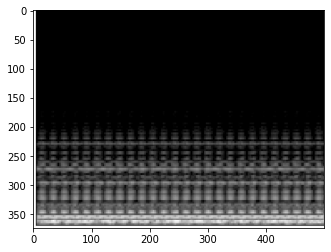

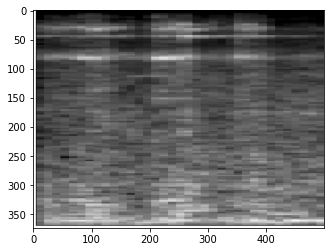

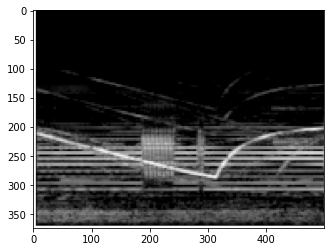

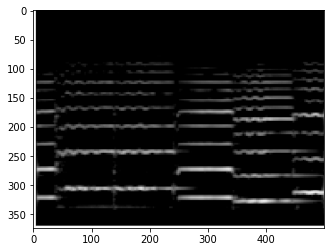

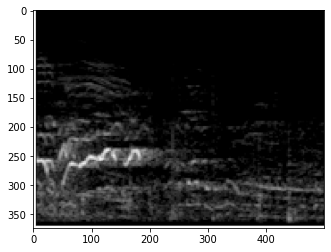

In [11]:
for img in df["images"].head():
  img_array = cv2.imread(os.path.join(img) ,cv2.IMREAD_GRAYSCALE)  # convert to array
  plt.imshow(img_array, cmap='gray')  # graph it
  plt.show()  # display!

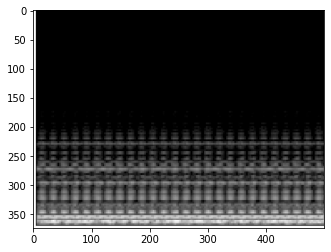

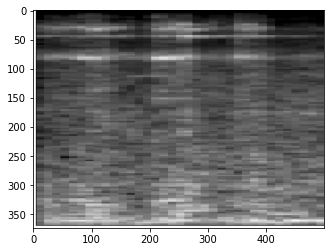

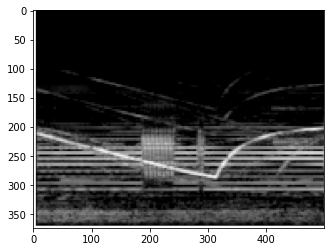

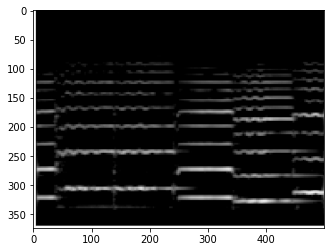

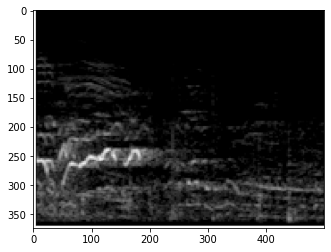

In [12]:
for img in df["images"].head():
  img_array = cv2.imread(img,cv2.IMREAD_GRAYSCALE)  # convert to array
  plt.imshow(img_array, cmap='gray')  # graph it
  plt.show()  # display!

In [40]:
img_array

array([[255, 255, 255, ...,   0,   0,   0],
       [255, 255, 255, ...,   0,   0,   0],
       [255, 255, 255, ...,   0,   0,   0],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]], dtype=uint8)

In [41]:
img_array.shape

(374, 500)

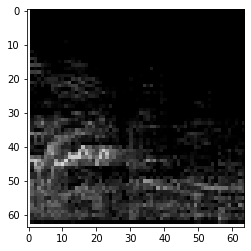

In [15]:
IMG_SIZE=64 ##64 YAP.....
new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
plt.imshow(new_array, cmap='gray')
plt.show()

In [16]:
DATADIR="/content/drive/MyDrive/kaggle/spectrograms/"
CATEGORIES=["0","1","2","3","4","5","6","7","8","9"]

training_data = []

def create_training_data():
    for category in CATEGORIES:  

        path = os.path.join(DATADIR,category)  
        class_num = CATEGORIES.index(category)  

        for img in tqdm(os.listdir(path)):  
            try:
                img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE)  
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE)) 
                training_data.append([new_array, class_num])  # [görsel,class]
            except Exception as e:  
                pass

create_training_data()

100%|██████████| 1000/1000 [00:18<00:00, 52.74it/s] 


In [42]:
print(len(training_data))

8732


In [39]:
training_data

[[array([[249,   0,   0, ...,   0,   0,   0],
         [249,   0,   0, ...,   0,   0,   0],
         [249,   0,   0, ...,   0,   0,   0],
         ...,
         [249,  38,  34, ...,  35,   6,   4],
         [249,  73,  51, ...,  52,  65,  67],
         [254, 249, 249, ..., 249, 249, 249]], dtype=uint8), 3],
 [array([[249,   0,   0, ...,   0,   0,   0],
         [249,   0,   0, ...,   0,   0,   0],
         [249,   0,   0, ...,   0,   0,   0],
         ...,
         [249,  76,  84, ...,  90,  92, 109],
         [249, 113, 126, ..., 152,  99, 133],
         [254, 249, 249, ..., 249, 249, 249]], dtype=uint8), 5],
 [array([[249,   0,   0, ...,   0,   0,   0],
         [249,   0,   0, ...,   0,   0,   0],
         [249,   0,   0, ...,   0,   0,   0],
         ...,
         [249,   0,   0, ...,   0,   0,   0],
         [249,   0,   0, ...,   0,   0,   0],
         [254, 249, 249, ..., 249, 249, 249]], dtype=uint8), 3],
 [array([[249,   0,   0, ...,   0,   0,   0],
         [249,   0,   0, ..

In [44]:
import random
random.shuffle(training_data)##KARIŞTIR...

In [45]:
for sample in training_data[:10]:
    print(sample[1])

8
7
7
2
9
8
9
8
0
3


In [46]:
X = []
y = []

for features,label in training_data:
    X.append(features)
    y.append(label)

In [32]:
import pickle

pickle_out = open("X.pickle","wb")
pickle.dump(X_train, pickle_out)
pickle_out.close()

pickle_out = open("y.pickle","wb")
pickle.dump(y, pickle_out)
pickle_out.close()

In [34]:
pickle_in = open("X.pickle","rb")
X = pickle.load(pickle_in)

pickle_in = open("y.pickle","rb")
y = pickle.load(pickle_in)

In [47]:
X=np.array(X)/255.0
X=np.reshape(X,(X.shape[0],IMG_SIZE,IMG_SIZE,1))
y=np.array(y)
import keras

from keras.utils import np_utils
new_target=np_utils.to_categorical(y)
from sklearn.model_selection import train_test_split

# First, create X_train, y_train and X_temporary and y_temporary datasets from X and y.
X_train,X_temporary,y_train,y_temporary = train_test_split(X,new_target,test_size=0.2)

# Using the X_temporary and y_temporary dataset we just created create validaiton and test datasets.
X_val , X_test , y_val , y_test = train_test_split(X_temporary,y_temporary,test_size=0.5)
# Print the lengths of the X, X_train, X_val and X_test
print(f'Length of the dataset : {len(X)}')
print(f'Length of the training dataset : {len(X_train)}')
print(f'Length of the validation dataset : {len(X_val)}')
print(f'Length of the test dataset : {len(X_test)}')

Length of the dataset : 8732
Length of the training dataset : 6985
Length of the validation dataset : 873
Length of the test dataset : 874


In [49]:
np.save('/content/drive/MyDrive/kaggle/X_train.npy',X_train)
np.save('/content/drive/MyDrive/kaggle/X_test.npy',X_test)
np.save('/content/drive/MyDrive/kaggle/X_val.npy',X_val)

In [50]:
np.save('/content/drive/MyDrive/kaggle/y_train.npy',y_train)
np.save('/content/drive/MyDrive/kaggle/y_val.npy',y_val)
np.save('/content/drive/MyDrive/kaggle/y_test.npy',y_test)